The libraries

In [2]:
# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

Importing data

In [5]:
# load a data file
# note the relative filepath! where is this file located?
gdf = gpd.read_file('acs2020_5yr_B03002_14000US06037463000.geojson')

#  Preliminary inspection

A quick look at the size of the data.

In [6]:
# get number of rows, columns
gdf.shape

(2499, 45)

In [7]:
# get first 5 rows
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10040682.0,0.0,5189338.0,0.0,2603280.0,2899.0,779166.0,3477.0,...,529.0,2075359.0,16947.0,470323.0,9898.0,387116.0,9699.0,83207.0,3161.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,460.0,2960.0,376.0,2393.0,353.0,17.0,18.0,...,13.0,260.0,219.0,150.0,129.0,124.0,118.0,26.0,42.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,858.0,3937.0,865.0,3159.0,832.0,148.0,143.0,...,13.0,36.0,42.0,45.0,58.0,41.0,57.0,4.0,6.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,474.0,2254.0,228.0,1659.0,280.0,94.0,104.0,...,13.0,586.0,276.0,283.0,276.0,252.0,271.0,31.0,40.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,651.0,2605.0,585.0,2026.0,553.0,213.0,166.0,...,13.0,580.0,321.0,103.0,111.0,103.0,111.0,0.0,13.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [8]:
# get a random row
gdf.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1705,14000US06037533501,"Census Tract 5335.01, Los Angeles, CA",3077.0,533.0,1.0,3.0,1.0,3.0,0.0,13.0,...,13.0,1428.0,337.0,326.0,361.0,326.0,361.0,0.0,13.0,"MULTIPOLYGON (((-118.20416 33.98906, -118.2040..."


<AxesSubplot:>

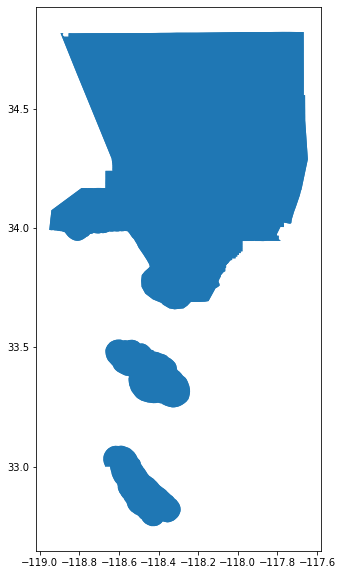

In [15]:
# plot it!
gdf.plot(figsize=(10,10))

<AxesSubplot:>

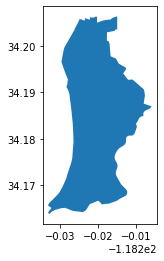

In [16]:
# plot a random row
gdf.sample().plot()

 # Data types

To get the data types, we will use .info().

In [11]:
# look at columns, null values, and the data types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2499 non-null   object  
 1   name              2499 non-null   object  
 2   B03002001         2499 non-null   float64 
 3   B03002001, Error  2499 non-null   float64 
 4   B03002002         2499 non-null   float64 
 5   B03002002, Error  2499 non-null   float64 
 6   B03002003         2499 non-null   float64 
 7   B03002003, Error  2499 non-null   float64 
 8   B03002004         2499 non-null   float64 
 9   B03002004, Error  2499 non-null   float64 
 10  B03002005         2499 non-null   float64 
 11  B03002005, Error  2499 non-null   float64 
 12  B03002006         2499 non-null   float64 
 13  B03002006, Error  2499 non-null   float64 
 14  B03002007         2499 non-null   float64 
 15  B03002007, Error  2499 non-null   float64 
 16  B03002008       

The FIPS code

What is the geoid? It is called a FIPS code but why is it important?

https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html


In [19]:
#''' FIPS CODE: 01     234     567890      1
#             state   country   tract     block grp'''

In [20]:
# get first five geoid's
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101220
4    14000US06037101221
Name: geoid, dtype: object

#  Delete county row


As we have observed, the first row in the data obtained from censusreporter is for the entire county. Keeping this row is problematic, as it represents a data record that is at a different scale. Let's delete it.

In [22]:
#Note that any data downloaded from censusreporter will have a "summary row" for the entire data. 
# check the data again
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10040682.0,0.0,5189338.0,0.0,2603280.0,2899.0,779166.0,3477.0,...,529.0,2075359.0,16947.0,470323.0,9898.0,387116.0,9699.0,83207.0,3161.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,460.0,2960.0,376.0,2393.0,353.0,17.0,18.0,...,13.0,260.0,219.0,150.0,129.0,124.0,118.0,26.0,42.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,858.0,3937.0,865.0,3159.0,832.0,148.0,143.0,...,13.0,36.0,42.0,45.0,58.0,41.0,57.0,4.0,6.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,474.0,2254.0,228.0,1659.0,280.0,94.0,104.0,...,13.0,586.0,276.0,283.0,276.0,252.0,271.0,31.0,40.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,651.0,2605.0,585.0,2026.0,553.0,213.0,166.0,...,13.0,580.0,321.0,103.0,111.0,103.0,111.0,0.0,13.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [23]:
# drop the row with index 0 (i.e. the first row)
gdf = gdf.drop([0])

In [24]:
# check to see if it has been deleted
gdf.head()


,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,460.0,2960.0,376.0,2393.0,353.0,17.0,18.0,...,13.0,260.0,219.0,150.0,129.0,124.0,118.0,26.0,42.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,858.0,3937.0,865.0,3159.0,832.0,148.0,143.0,...,13.0,36.0,42.0,45.0,58.0,41.0,57.0,4.0,6.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,474.0,2254.0,228.0,1659.0,280.0,94.0,104.0,...,13.0,586.0,276.0,283.0,276.0,252.0,271.0,31.0,40.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,651.0,2605.0,585.0,2026.0,553.0,213.0,166.0,...,13.0,580.0,321.0,103.0,111.0,103.0,111.0,0.0,13.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
5,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",2717.0,442.0,1535.0,361.0,1466.0,381.0,4.0,14.0,...,13.0,290.0,332.0,29.0,59.0,0.0,13.0,29.0,59.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."


#  The census data dictionary

There are a lot of columns. What are these columns? Column headers are defined in the metadata.json file that comes in the dowloaded zipfile from censusreporter. Click the link below to open the json file in another tab.

'metadata.json'

Let's identify which columns are needed, and which are not for our exploration.

In [28]:
### Dropping columns ###

# There are many columns that we do not need.

# output existing columns as a list
# create a list of columns to keep
# redefine gdf with only the columns to keep



In [29]:
list(gdf) # this is the same as df.columns.to_list()

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [30]:
# create a list of columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [31]:
# redefine gdf with only columns to keep
gdf = gdf[columns_to_keep]

In [32]:
# check the slimmed down gdf
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3923.0,2960.0,2393.0,17.0,2.0,406.0,3.0,9.0,130.0,963.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4119.0,3937.0,3159.0,148.0,0.0,426.0,0.0,0.0,204.0,182.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3775.0,2254.0,1659.0,94.0,0.0,390.0,0.0,6.0,105.0,1521.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3787.0,2605.0,2026.0,213.0,0.0,267.0,0.0,99.0,0.0,1182.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
5,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",2717.0,1535.0,1466.0,4.0,0.0,65.0,0.0,0.0,0.0,1182.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."
